# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#lists to be populated w/ weather data
city_name = []
country = []
lattitude =[]
longitude = []
date = []
temperature = []
wind_speed = []
cloud_cover = []
humidity = []        

In [4]:
#creating url for api calls, setting up for loop w/ try/except to pull data from json and put it in lists
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

counter = 1

for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lattitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        temperature.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cloud_cover.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        
        print(f"Processed city {counter} | added {city}")
        
        
        counter = counter + 1
        time.sleep(1.05)
    except:
        
        
        print("No entry here. Moving on.")
        
    continue
print("Completed")

Processed city 1 | added ust-ilimsk
Processed city 2 | added kodiak
Processed city 3 | added mataura
Processed city 4 | added naze
Processed city 5 | added rikitea
No entry here. Moving on.
Processed city 6 | added butaritari
Processed city 7 | added siocon
Processed city 8 | added mangai
Processed city 9 | added camana
Processed city 10 | added xining
Processed city 11 | added port-gentil
Processed city 12 | added byron bay
Processed city 13 | added holguin
Processed city 14 | added ribeira grande
Processed city 15 | added jasper
Processed city 16 | added upernavik
Processed city 17 | added jamestown
Processed city 18 | added saint-philippe
Processed city 19 | added yeppoon
Processed city 20 | added khatanga
Processed city 21 | added gizo
Processed city 22 | added cidreira
Processed city 23 | added mecca
Processed city 24 | added huambo
Processed city 25 | added skjervoy
Processed city 26 | added busselton
Processed city 27 | added lebu
Processed city 28 | added katangli
Processed cit

Processed city 217 | added cedeno
Processed city 218 | added aguimes
Processed city 219 | added amapa
No entry here. Moving on.
Processed city 220 | added katsuura
Processed city 221 | added havoysund
Processed city 222 | added sao joao evangelista
Processed city 223 | added isangel
No entry here. Moving on.
Processed city 224 | added esquipulas
No entry here. Moving on.
Processed city 225 | added solvychegodsk
Processed city 226 | added la ronge
Processed city 227 | added faro
Processed city 228 | added umm lajj
Processed city 229 | added hovd
Processed city 230 | added vilyuysk
Processed city 231 | added tuatapere
Processed city 232 | added kassala
Processed city 233 | added alliance
Processed city 234 | added goderich
Processed city 235 | added thinadhoo
Processed city 236 | added tokmak
Processed city 237 | added fukue
Processed city 238 | added ahwa
Processed city 239 | added kurilsk
Processed city 240 | added saint-augustin
Processed city 241 | added ciudad bolivar
Processed city

Processed city 425 | added pundaguitan
No entry here. Moving on.
Processed city 426 | added pringsewu
Processed city 427 | added marrakesh
Processed city 428 | added floro
Processed city 429 | added siparia
Processed city 430 | added dumka
Processed city 431 | added suoyarvi
Processed city 432 | added dakar
Processed city 433 | added pyay
Processed city 434 | added nadaun
Processed city 435 | added vikhorevka
Processed city 436 | added usta muhammad
Processed city 437 | added soyo
Processed city 438 | added lasa
Processed city 439 | added sandnessjoen
Processed city 440 | added oriximina
Processed city 441 | added sola
No entry here. Moving on.
Processed city 442 | added sechura
Processed city 443 | added assiniboia
No entry here. Moving on.
Processed city 444 | added beloha
Processed city 445 | added mama
Processed city 446 | added acari
Processed city 447 | added pangnirtung
Processed city 448 | added korla
Processed city 449 | added evensk
Processed city 450 | added launceston
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame ({
    "City": city_name,
    "Country": country,
    "Latitude": lattitude,
    "Longitude": longitude,
    "Date": date,
    "Temperature": temperature,
    "Wind_Speed": wind_speed,
    "Cloud_cover": cloud_cover,
    "Humidity": humidity
})

weather_df.head()

,City,Country,Latitude,Longitude,Date,Temperature,Wind_Speed,Cloud_cover,Humidity
0,Ust'-Ilimsk,RU,58.00,102.66,1597632371,65.30,6.33,71,36
1,Saint Paul Harbor,US,57.79,-152.41,1597632330,59.74,7.40,0,77
2,Mataura,NZ,-46.19,168.86,1597632047,48.00,4.00,51,79
3,Naze,JP,28.37,129.48,1597632375,89.60,11.41,20,75
4,Rikitea,PF,-23.12,-134.97,1597632286,70.59,13.00,4,78


In [6]:
weather_df.to_csv ("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
no_humidity = weather_df.loc[:, 'Humidity'].unique()
no_humidity   

array([ 36,  77,  79,  75,  78,  62,  74,  58,  88,  37,  73,  69,  93,
        55,  25,  63,  76,  30,  40,  81,  82,  85,  95,  86,  71,  60,
        70,  87,  48,  43,  64,  72,  97,  92,  66,  83,  80,  59,  41,
       100,  99,  94,  68,  14,  84,  42,  61,  65,  54,  96,  33,  57,
        89,  28,   9,  91,  17,  67,  56,  34,  29,  38,  35,  12,  51,
         3,  53,  50,  90,  98,   8,  46,  52,  24,  44,  26,  32,  16,
        21,  45,  22,  47,  39,  11,  23,  49,  15], dtype=int64)

In [ ]:
#  Get the indices of cities that have humidity over 100%.
N/A

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
N/A

In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

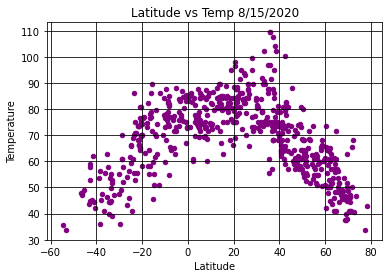

In [8]:
ax1 = weather_df.plot.scatter(x='Latitude', y='Temperature', c='Purple',  title= 'Latitude vs Temp 8/15/2020' )
plt.grid(b=True, which='major', axis='both', linestyle="-", color='black')
plt.savefig('../output_data/temperature_latitude.png')

## Latitude vs. Humidity Plot

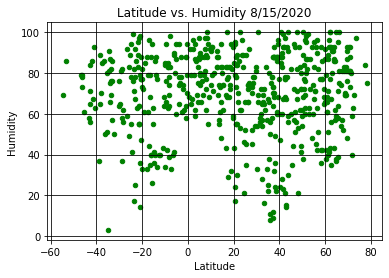

In [9]:
ax1 = weather_df.plot.scatter(x='Latitude', y='Humidity', c='Green', title= 'Latitude vs. Humidity 8/15/2020' )
plt.grid(b=True, which='major', axis='both', linestyle="-", color='black')
plt.savefig('../output_data/Latitude_Humidity.png')

## Latitude vs. Cloudiness Plot

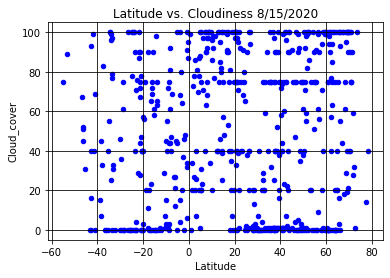

In [10]:
ax1 = weather_df.plot.scatter(x='Latitude', y='Cloud_cover', c='Blue', title= 'Latitude vs. Cloudiness 8/15/2020' )
plt.grid(b=True, which='major', axis='both', linestyle="-", color='black')
plt.savefig('../output_data/Latitude_Cloudiness.png')

## Latitude vs. Wind Speed Plot

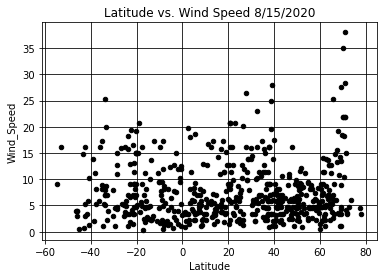

In [11]:
ax1 = weather_df.plot.scatter(x='Latitude', y='Wind_Speed', c='Black', title= 'Latitude vs. Wind Speed 8/15/2020' )
plt.grid(b=True, which='major', axis='both', linestyle="-", color='black')
plt.savefig('../output_data/Latitude_Wind Speed.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern Hemisphere DataFrames
northern_df = weather_df[weather_df.Latitude > 0]
northern_df

,City,Country,Latitude,Longitude,Date,Temperature,Wind_Speed,Cloud_cover,Humidity
0,Ust'-Ilimsk,RU,58.00,102.66,1597632371,65.30,6.33,71,36
1,Saint Paul Harbor,US,57.79,-152.41,1597632330,59.74,7.40,0,77
3,Naze,JP,28.37,129.48,1597632375,89.60,11.41,20,75
5,Butaritari,KI,3.07,172.79,1597632317,81.59,1.52,26,62
6,Siocon,PH,7.71,122.14,1597632380,87.21,7.07,90,62
...,...,...,...,...,...,...,...,...,...
570,Marzuq,YE,14.40,46.47,1597633276,80.87,4.36,25,48
571,La Cruz,MX,23.92,-106.90,1597633333,84.00,1.99,75,89
572,Berezovyy,RU,51.67,135.70,1597633334,60.03,3.78,99,80
574,Batagay-Alyta,RU,67.80,130.41,1597633338,48.76,3.49,18,52


In [13]:
# Create  Southern Hemisphere DataFrames  
southern_df = weather_df[weather_df.Latitude < 0]
southern_df

,City,Country,Latitude,Longitude,Date,Temperature,Wind_Speed,Cloud_cover,Humidity
2,Mataura,NZ,-46.19,168.86,1597632047,48.00,4.00,51,79
4,Rikitea,PF,-23.12,-134.97,1597632286,70.59,13.00,4,78
7,Mangai,CD,-4.05,19.53,1597632382,75.94,0.72,100,74
8,Camaná,PE,-16.62,-72.71,1597632383,58.30,6.91,65,79
10,Port-Gentil,GA,-0.72,8.78,1597632387,75.15,11.86,100,88
...,...,...,...,...,...,...,...,...,...
552,Mhlambanyatsi,SZ,-26.45,31.02,1597633300,43.27,5.23,100,92
555,São Félix do Xingu,BR,-6.64,-51.99,1597633250,75.78,1.97,27,40
558,Goiatuba,BR,-18.01,-49.35,1597633310,74.59,5.64,1,33
564,Barão de Melgaço,BR,-16.19,-55.97,1597633319,86.00,2.17,72,40


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7230226843103594


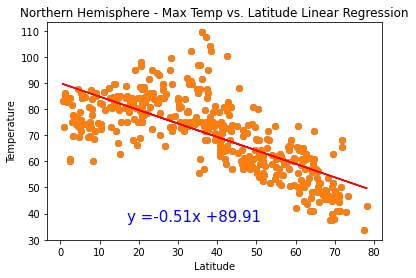

In [39]:
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
plt.scatter(x_values, y_values)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (17,37), fontsize = 15, color="Blue")

plt.savefig('../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
Linear regression tells us here higher the temperature the lower the latitude. however there seems to be more of a even spread of at latitude 40 with higher temps

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7582116527442773


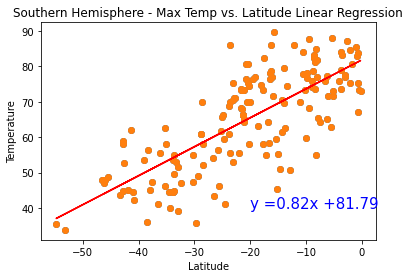

In [40]:
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
plt.scatter(x_values, y_values)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,40), fontsize = 15, color="Blue")

plt.savefig('../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
most of the countries range in the 90 degree weather and as we get closer to the equator the temp gets higher and the ideal place to be would be the places in the negative range of the latitude, considering i live in texas anything with a latitude of -20 and -10 seems good to me.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.05274603429708527


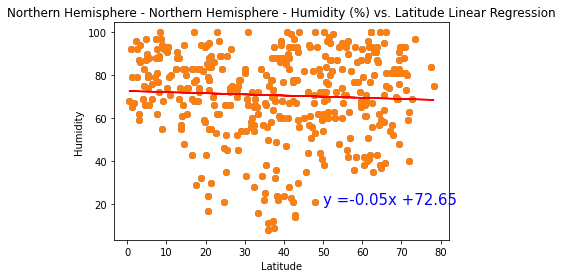

In [41]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
plt.scatter(x_values, y_values)
plt.title("Northern Hemisphere - Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,20), fontsize = 15, color="Blue")

plt.savefig('../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
humidity is horrible anywhere and everywhere...there are A Lot of places with A LOT of humidity, but there are very few that are low in humidity 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.0017753439377729743


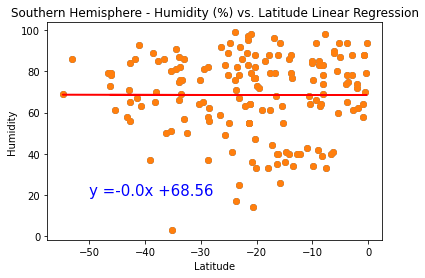

In [43]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
plt.scatter(x_values, y_values)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize = 15, color="Blue")

plt.savefig('../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
not as many places with humidity, not matter the latitude. the lower the humidity the further from the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.041439157211180425


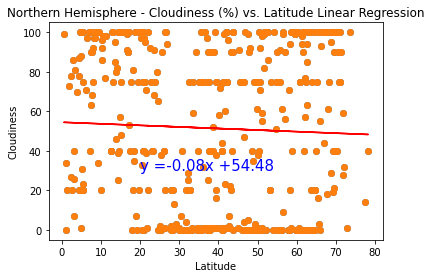

In [44]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloud_cover']
plt.scatter(x_values, y_values)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,30), fontsize = 15, color="Blue")

plt.savefig('../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
cloud cover is pretty spread out in the northern hemisphere, however between the latitudes of 0-70 seems to have a 100 % cloud cover, ranges 20-65 has no cloud cover, 10-70 have about 70% cloud cover.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.029103683426781254


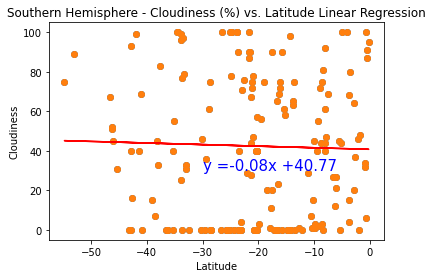

In [45]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloud_cover']
plt.scatter(x_values, y_values)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,30), fontsize = 15, color="Blue")

plt.savefig('../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
southern hempishere has much less cloud activity

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09908705358861465


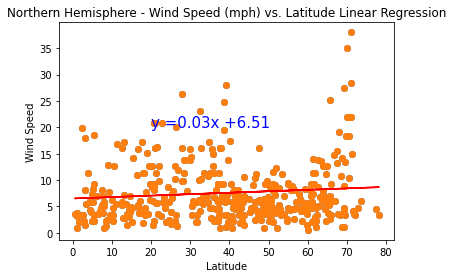

In [46]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind_Speed']
plt.scatter(x_values, y_values)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,20), fontsize = 15, color="Blue")

plt.savefig('../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
very few cities with wind above 20 most of the cities are ranged between 0-10 are start becoming more sparingly as the speed gets higher. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08683355934402076


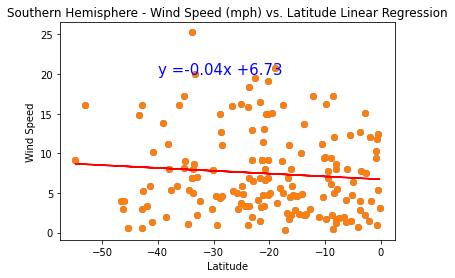

In [47]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind_Speed']
plt.scatter(x_values, y_values)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,20), fontsize = 15, color="Blue")

plt.savefig('../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
most of the wind is by the equator as we get further away from the equator the less wind, one 1 country has a wind speed higher then 20